In [1]:
import numpy as np
import pandas as pd
from os import path

In [2]:
from sapiens import predict_sequence_embedding

/home/brazdilv/.conda/envs/sapiens/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_DIR = "../../data/"

In [3]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/chen_data.csv"), index_col=0)
chen_data.head(5)

,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0


In [4]:
chen_data_short = chen_data[chen_data["heavy"].str.len() <= 140]
print(len(chen_data_short))
chen_data_short.head()

1562


,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0


In [7]:
def embed_sequence(row, layer=-2):
    heavy = predict_sequence_embedding(
        row["heavy"], 
        "H", 
        layer=layer
    )
    light = predict_sequence_embedding(
        row["light"], 
        "L", 
        layer=layer
    )
    
    embedding = np.concatenate([heavy, light])
    return embedding

In [28]:
embed_sequence(chen_data.loc[1618])

In [8]:
embeddings = pd.DataFrame(chen_data_short.apply(embed_sequence, axis=1).to_list())
embeddings.insert(0, "Ab_ID", chen_data_short["Antibody_ID"])
embeddings.columns = embeddings.columns.astype(str)
#embeddings.to_feather(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings.ftr"))
embeddings.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,246,247,248,249,250,251,252,253,254,255
0,12e8,-0.696352,0.052306,0.520963,0.226296,-0.545760,0.234339,0.391248,-0.219586,0.119061,...,-0.597680,-0.442461,0.178219,0.424078,-0.111170,-0.593700,0.065906,0.054678,-0.407127,-0.238511
1,15c8,-0.728888,0.086030,0.465099,0.115899,-0.675514,0.328003,0.425670,-0.272971,0.073882,...,-0.209994,0.854753,-0.004057,0.260837,0.610122,-0.666045,0.011173,-0.511014,-0.537592,-0.042577
2,1a0q,-0.692313,-0.074301,0.530585,0.173256,-0.556583,0.297178,0.370046,-0.340101,-0.002898,...,-0.356758,-0.384293,-0.192209,0.513924,-0.062218,-0.663732,0.108769,0.109421,-0.275254,-0.114657
3,1a14,-0.687881,-0.009050,0.605025,0.057967,-0.470441,0.265434,0.395603,-0.362499,0.042408,...,-0.527391,-0.425693,-0.027963,0.759079,-0.108661,-0.634689,-0.055484,-0.031775,-0.263180,-0.121975
4,1a2y,-0.004903,-0.136997,0.369580,-0.274192,-0.704842,-0.200002,0.484024,-0.065528,0.100490,...,-0.566379,-0.091726,0.044966,0.519444,0.189693,-0.565869,-0.010079,0.160701,-0.417042,-0.058936


In [9]:
embeddings["Y"] = chen_data_short["Y"]
embeddings.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,Y
0,12e8,-0.696352,0.052306,0.520963,0.226296,-0.545760,0.234339,0.391248,-0.219586,0.119061,...,-0.442461,0.178219,0.424078,-0.111170,-0.593700,0.065906,0.054678,-0.407127,-0.238511,0.0
1,15c8,-0.728888,0.086030,0.465099,0.115899,-0.675514,0.328003,0.425670,-0.272971,0.073882,...,0.854753,-0.004057,0.260837,0.610122,-0.666045,0.011173,-0.511014,-0.537592,-0.042577,0.0
2,1a0q,-0.692313,-0.074301,0.530585,0.173256,-0.556583,0.297178,0.370046,-0.340101,-0.002898,...,-0.384293,-0.192209,0.513924,-0.062218,-0.663732,0.108769,0.109421,-0.275254,-0.114657,1.0
3,1a14,-0.687881,-0.009050,0.605025,0.057967,-0.470441,0.265434,0.395603,-0.362499,0.042408,...,-0.425693,-0.027963,0.759079,-0.108661,-0.634689,-0.055484,-0.031775,-0.263180,-0.121975,0.0
4,1a2y,-0.004903,-0.136997,0.369580,-0.274192,-0.704842,-0.200002,0.484024,-0.065528,0.100490,...,-0.091726,0.044966,0.519444,0.189693,-0.565869,-0.010079,0.160701,-0.417042,-0.058936,0.0


In [10]:
embeddings.to_feather(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings_prev.ftr"))

In [5]:
embeddings = pd.read_feather(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings_prev.ftr"))

In [46]:
chen_data[chen_data["heavy"].str.len() > 143]
indices = chen_data[chen_data["heavy"].str.len() > 140].index

In [52]:
chen_data[chen_data["heavy"].str.len() == 140]

,Antibody_ID,heavy,light,Y
1008,3u1s,QVQLVQSGAEVKKPGSSVKVSCKASGNSFSNHDVHWVRQATGQGLE...,EVVITQSPLFLPVTPGEAASLSCKCSHSLQHSTGANYLAWYLQRPG...,0


In [53]:
embed_sequence(chen_data.loc[1008])

array([-0.28252992,  0.07246271,  0.29181525,  0.11483017,  0.12999843,
       -0.07059711, -0.22013626, -0.32268146, -0.05911254,  0.0290522 ,
       -0.25872204, -0.11831281,  0.17609318,  0.0963475 ,  0.01062322,
       -0.13352418, -0.04778805,  0.24351208,  0.07833483,  0.02363428,
       -0.02278778, -0.33563596,  0.02135167,  0.04609078, -0.00578414,
       -0.3145087 , -0.3899804 ,  0.03675899, -0.00855669,  0.25341177,
        0.03331763, -0.02998232, -0.12642251,  0.13882753, -0.13271187,
        0.08363034, -0.26176643,  0.05960616,  0.4383062 , -0.28734007,
        0.2759207 ,  0.12156837,  0.01480813, -0.05221846, -0.36704844,
       -0.13116908,  0.15756232, -0.2167949 , -0.14026366, -0.13674779,
        0.2026569 , -0.28815833, -0.19025286, -0.23410955,  0.03381168,
       -0.14780466,  0.05004765, -0.14252734,  0.0545227 , -0.3362012 ,
       -0.26914197, -0.14329153,  0.01887868,  0.21291602,  0.28161976,
       -0.34518328,  0.03528953, -0.0649538 ,  0.28079352, -0.10

In [12]:
tap_data = pd.read_csv(path.join(DATA_DIR, "tap/TAP_data.csv"))
tap_data.head()

,Antibody_ID,heavy,light,CDR_length,PSH,PPC,PNC,SFvCSP,Y
0,Abagovomab,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,46,129.7603,0.0000,0.0000,16.32,1
1,Abituzumab,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,45,115.9106,0.0954,0.0421,-3.10,1
2,Abrilumab,QVQLVQSGAEVKKPGASVKVSCKVSGYTLSDLSIHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,45,109.6995,0.0000,0.8965,-4.00,1
3,Actoxumab,QVQLVESGGGVVQPGRSLRLSCAASGFSFSNYGMHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQHKPGKAPKL...,49,112.6290,0.0000,1.1247,3.10,1
4,Adalimumab,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,48,111.2512,0.0485,1.1364,-19.50,1


In [13]:
embeddings_tap = pd.DataFrame(tap_data.apply(embed_sequence, axis=1).to_list())
embeddings_tap.insert(0, "Ab_ID", tap_data["Antibody_ID"])
embeddings_tap.columns = embeddings_tap.columns.astype(str)
embeddings_tap.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,246,247,248,249,250,251,252,253,254,255
0,Abagovomab,-0.606308,-0.022296,0.611225,0.015435,-0.527438,0.350888,0.311644,-0.337367,-0.099143,...,-0.673000,-0.111188,0.017769,0.533291,0.215492,-0.663727,0.010581,0.077778,-0.525761,-0.093044
1,Abituzumab,-0.578751,0.138788,0.636994,-0.080146,-0.427501,0.344186,0.255121,-0.447043,-0.027987,...,-0.846110,-0.380326,0.029981,0.702082,-0.083155,-0.691975,0.126669,-0.047594,-0.440913,-0.021831
2,Abrilumab,-0.470234,-0.145639,0.577861,0.017260,-0.234261,0.485487,-0.019204,-0.348597,0.218892,...,-0.773912,-0.239361,0.170578,0.713336,0.156544,-0.877622,0.225456,-0.441917,-0.541337,0.194087
3,Actoxumab,-0.393604,-0.089348,0.289423,0.226341,-0.534693,0.611426,0.027047,-0.235481,-0.368352,...,-0.802823,-0.222787,0.158823,0.745319,0.131903,-0.918564,0.291241,-0.438134,-0.568179,0.245760
4,Adalimumab,-0.171150,0.112696,0.119873,-0.006856,-0.631029,0.787800,0.245066,-0.149496,-0.567417,...,-0.816562,-0.366364,-0.010229,0.677200,-0.066503,-0.669080,0.274983,0.076494,-0.354007,-0.028038


In [14]:
embeddings_tap["Y"] = tap_data["Y"]
embeddings_tap.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,Y
0,Abagovomab,-0.606308,-0.022296,0.611225,0.015435,-0.527438,0.350888,0.311644,-0.337367,-0.099143,...,-0.111188,0.017769,0.533291,0.215492,-0.663727,0.010581,0.077778,-0.525761,-0.093044,1
1,Abituzumab,-0.578751,0.138788,0.636994,-0.080146,-0.427501,0.344186,0.255121,-0.447043,-0.027987,...,-0.380326,0.029981,0.702082,-0.083155,-0.691975,0.126669,-0.047594,-0.440913,-0.021831,1
2,Abrilumab,-0.470234,-0.145639,0.577861,0.017260,-0.234261,0.485487,-0.019204,-0.348597,0.218892,...,-0.239361,0.170578,0.713336,0.156544,-0.877622,0.225456,-0.441917,-0.541337,0.194087,1
3,Actoxumab,-0.393604,-0.089348,0.289423,0.226341,-0.534693,0.611426,0.027047,-0.235481,-0.368352,...,-0.222787,0.158823,0.745319,0.131903,-0.918564,0.291241,-0.438134,-0.568179,0.245760,1
4,Adalimumab,-0.171150,0.112696,0.119873,-0.006856,-0.631029,0.787800,0.245066,-0.149496,-0.567417,...,-0.366364,-0.010229,0.677200,-0.066503,-0.669080,0.274983,0.076494,-0.354007,-0.028038,1


In [15]:
embeddings_tap.to_feather(path.join(DATA_DIR, "tap/embeddings/sapiens/sapiens_tap_embeddings_prev.ftr"))

In [6]:
embeddings_tap = pd.read_feather(path.join(DATA_DIR, "tap/embeddings/sapiens/sapiens_tap_embeddings_prev.ftr"))

In [7]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def calculate_tsne(
    x, components, perplexity, n_iter=300, metric="euclidean"
):
    tsne = TSNE(n_components=components, verbose=1, perplexity=perplexity, n_iter=n_iter, metric=metric)
    X_embedded = tsne.fit_transform(x)
    
    return X_embedded
    

In [9]:
def plot_transformed(x_pc, y, comp_to_plot=[0,1], title=None, palette=['#1f76b4','orange']):
    df = pd.DataFrame()
    df['x'] = x_pc[:,comp_to_plot[0]]
    df['y'] = x_pc[:,comp_to_plot[1]]
    df["label"] = y
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        #legend="full",
        alpha=0.6,
        palette=palette
    )
    if title:
        plt.title(title, fontsize=20)
    plt.show()

In [10]:
tsne_tr = calculate_tsne(embeddings.drop(["Y", "Ab_ID"], axis=1), components=3, perplexity=8)

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 1562 samples in 0.001s...
[t-SNE] Computed neighbors for 1562 samples in 0.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1562
[t-SNE] Computed conditional probabilities for sample 1562 / 1562
[t-SNE] Mean sigma: 0.579604
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.964855
[t-SNE] KL divergence after 300 iterations: 0.799590


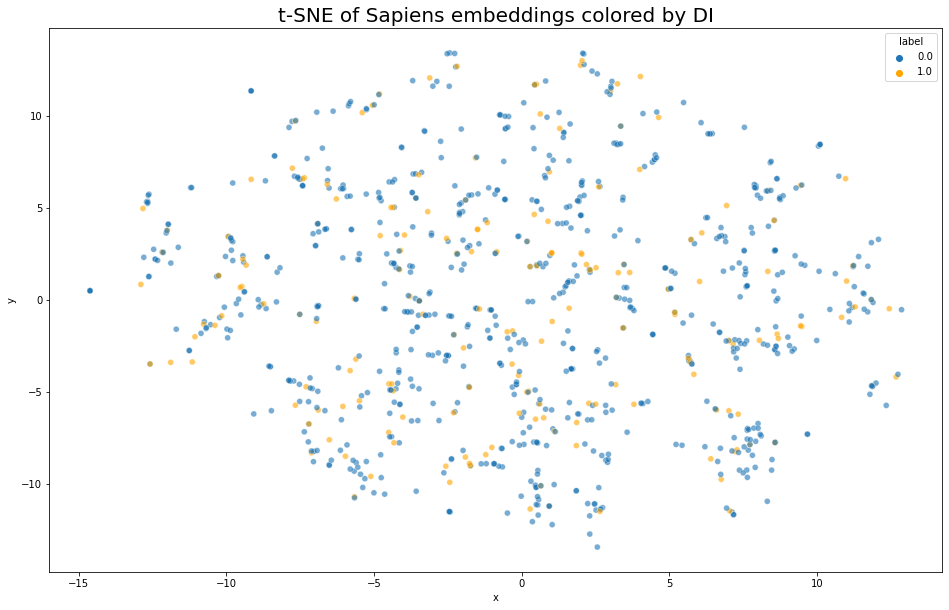

In [11]:
plot_transformed(tsne_tr, embeddings["Y"], [0, 1], "t-SNE of Sapiens embeddings colored by DI")

In [12]:
sabdab = pd.read_csv(path.join(DATA_DIR, "sabdab_summary_filtered.tsv"), sep="\t")
sabdab.head()

,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,light_subclass,light_ctype,affinity,delta_g,affinity_method,temperature,pmid,HLchain,Hchain_fa,Lchain_fa
0,6igu,H,L,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,2019-10-09,...,IGKV1,Kappa,None,None,None,None,None,HL,6igu_H_VH.fa,6igu_L_VL.fa
1,6u1t,H,L,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,2019-10-09,...,IGKV12,Kappa,None,None,None,None,None,HL,6u1t_H_VH.fa,6u1t_L_VL.fa
2,4o51,B,A,0,N,peptide,NaN,ides hinge peptide,IMMUNE SYSTEM,2014-03-26,...,IGKV1,Kappa,None,None,None,None,None,BA,4o51_B_VH.fa,4o51_A_VL.fa
3,5w08,K,L,0,C,protein,NaN,hemagglutinin ha1,VIRAL PROTEIN/IMMUNE SYSTEM,2018-02-14,...,IGLV2,Lambda,None,None,None,None,None,KL,5w08_K_VH.fa,5w08_L_VL.fa
4,5i1e,H,L,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,2016-06-08,...,IGKV1,Kappa,None,None,None,None,None,HL,5i1e_H_VH.fa,5i1e_L_VL.fa


In [13]:
embeddings = embeddings.merge(sabdab[["pdb", "heavy_subclass", "light_subclass"]], left_on="Ab_ID", right_on="pdb").drop("pdb", axis=1)
embeddings.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,249,250,251,252,253,254,255,Y,heavy_subclass,light_subclass
0,12e8,-0.696352,0.052306,0.520963,0.226296,-0.545760,0.234339,0.391248,-0.219586,0.119061,...,0.424078,-0.111170,-0.593700,0.065906,0.054678,-0.407127,-0.238511,0.0,IGHV14,IGKV6
1,12e8,-0.696352,0.052306,0.520963,0.226296,-0.545760,0.234339,0.391248,-0.219586,0.119061,...,0.424078,-0.111170,-0.593700,0.065906,0.054678,-0.407127,-0.238511,0.0,IGHV14,IGKV6
2,15c8,-0.728888,0.086030,0.465099,0.115899,-0.675514,0.328003,0.425670,-0.272971,0.073882,...,0.260837,0.610122,-0.666045,0.011173,-0.511014,-0.537592,-0.042577,0.0,IGHV14,IGKV4
3,1a0q,-0.692313,-0.074301,0.530585,0.173256,-0.556583,0.297178,0.370046,-0.340101,-0.002898,...,0.513924,-0.062218,-0.663732,0.108769,0.109421,-0.275254,-0.114657,1.0,IGHV1,IGKV19
4,1a14,-0.687881,-0.009050,0.605025,0.057967,-0.470441,0.265434,0.395603,-0.362499,0.042408,...,0.759079,-0.108661,-0.634689,-0.055484,-0.031775,-0.263180,-0.121975,0.0,IGHV1,IGKV10


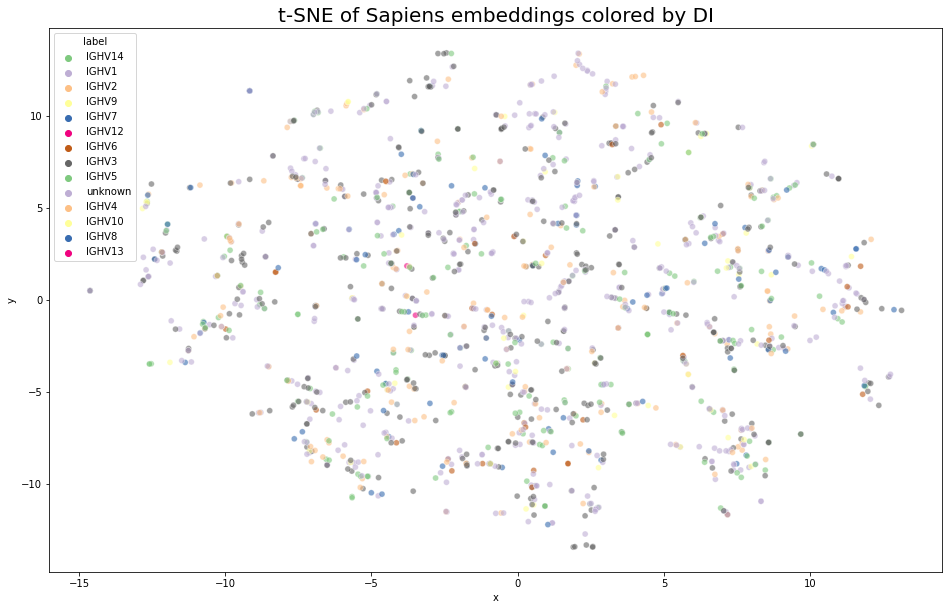

In [15]:
plot_transformed(tsne_tr, embeddings["heavy_subclass"], [0, 1], "t-SNE of Sapiens embeddings colored by DI", palette="Accent")

In [16]:
tsne_tr = calculate_tsne(embeddings.drop(["Y", "Ab_ID", "heavy_subclass", "light_subclass"], axis=1), components=3, perplexity=30)

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1559 samples in 0.001s...
[t-SNE] Computed neighbors for 1559 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1559
[t-SNE] Computed conditional probabilities for sample 1559 / 1559
[t-SNE] Mean sigma: 1.376953
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.850372
[t-SNE] KL divergence after 300 iterations: 0.474108


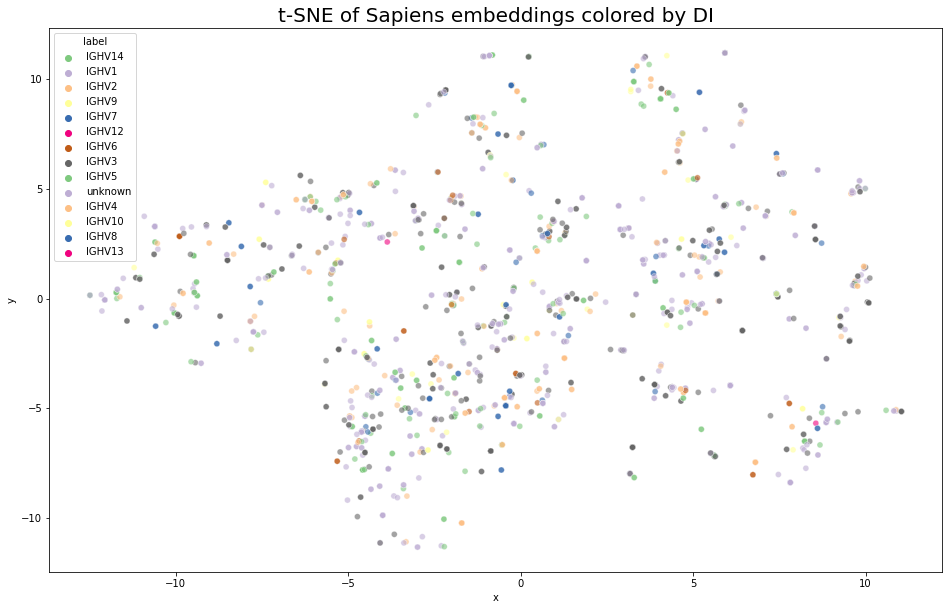

In [17]:
plot_transformed(tsne_tr, embeddings["heavy_subclass"], [0, 1], "t-SNE of Sapiens embeddings colored by DI", palette="Accent")